In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install pot
!pip install numba

ModuleNotFoundError: No module named 'google'

In [1]:
import sys
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import numpy as np
import ot
import time
import numba
import torch
#parent_path='/content/drive/MyDrive/Colab Notebooks/sliced_opt'
parent_path='/home/baly/projects/sliced_opt'
os.chdir(parent_path)
print(parent_path)
from sopt.library import *
from sopt.lib_ot import *   
#import opt1d 


/home/baly/projects/sliced_opt


In [ ]:
#test1
Lambda_list=np.array([20,100]).astype(np.float64)
k=5
n_list=np.arange(500,int(2e4),step=500)
method_list=['lp','new','new_C','sinkhorn','pot']
name='experiment/performance_test/result/time_list_uniform.pt'
try:
  time_list=torch.load(name)
except:
  time_list={}
  for (i,method) in enumerate(method_list):
    time_list[method]=np.zeros((n_list.shape[0],Lambda_list.shape[0],k))
  torch.save(time_list,name)



for (ni,n) in enumerate(n_list):
    time_list=torch.load(name)
    m=n+1000
    print('n',n)
    print('m',m)
    mu=np.ones(n,dtype=np.float64)
    nu=np.ones(m,dtype=np.float64)
    for i in range (k):
    
        X=np.random.uniform(-20,20,n).astype(np.float64)
        Y=np.random.uniform(-20,20,m).astype(np.float64)
        
        X1=X.copy()
        Y1=Y.copy()
        start_time = time.time()
        X1.sort()
        Y1.sort()
        M=cost_matrix(X1,Y1)
        pot(M) #,verbose=False,plots=False)
        end_time = time.time()
        time_list['pot'][ni,0,i]=end_time-start_time
        #print('ours numba done')
            
        for (j,Lambda) in enumerate(Lambda_list):
            X1=X.copy()
            Y1=Y.copy()
            start_time = time.time()
            X1.sort()
            Y1.sort()
            M=cost_matrix(X1,Y1)
            obj,phi,psi,piRow,piCol=solve_opt(M,Lambda) #,verbose=False,plots=False)
            end_time = time.time()
            time_list['new'][ni,j,i]=end_time-start_time
            
            
            X1=X.copy()
            Y1=Y.copy()
            start_time = time.time()
            X1.sort()
            Y1.sort()
            
            #obj,phi,psi,piRow,piCol=opt1d.solve(X1,Y1,Lambda) #comment out it if you do not install opt-1d c++ solver 
            end_time = time.time()
            time_list['new_C'][ni,j,i]=end_time-start_time


            numItermax=int(200*n*np.log(n))
            X1=X.copy()
            Y1=Y.copy()
            start_time = time.time()
            M=cost_matrix(X1,Y1)
            cost,gamma=opt_lp(mu,nu,M,Lambda,numItermax)
            end_time = time.time()
            time_list['lp'][ni,j,i]=end_time-start_time
                
            X1=X.copy()
            Y1=Y.copy()
            reg=np.float64(max(Lambda/40,0.1))
            numItermax=int(200*n*np.log(n))
            start_time=time.time()
            M=cost_matrix(X1,Y1)
            sinkhorn_knopp_opt(mu,nu,M,Lambda,reg,numItermax=numItermax)
            end_time = time.time()
            time_list['sinkhorn'][ni,j,i]=end_time-start_time
    torch.save(time_list,name)

In [3]:
Lambda_list=np.array([20,100]).astype(np.float64)
k=5
n_list=np.arange(500,int(2e4),step=500)
print('check')

check


In [17]:
# test2
mean1=np.linspace(-4,4,5)
mean2=np.linspace(-5,5,6)
var1=np.ones(5)
var2=np.ones(6)

        
#test1
Lambda_list=np.array([20,100]).astype(np.float64)
k=5
n_list=np.arange(500,int(2e4),step=500)

k=5
n_list=np.arange(500,int(2e4),step=500)
method_list=['lp','new','new_C','sinkhorn','pot']
name='experiment/performance_test/result/time_list_gaussian.pt'
try:
  time_list=torch.load(name)
except:
  time_list={}
  for (i,method) in enumerate(method_list):
    time_list[method]=np.zeros((n_list.shape[0],Lambda_list.shape[0],k))
  torch.save(time_list,name)



for (ni,n) in enumerate(n_list):
    time_list=torch.load(name)
    m=n+1000
    print('n',n)
    print('m',m)
    mu=np.ones(n,dtype=np.float64)
    nu=np.ones(m,dtype=np.float64)
    for i in range (k):
        X=Gaussian_mixture(mean1,var1,n) #.astype(np.float32) #np.random.uniform(-20,20,n).astype(np.float32)
        Y=Gaussian_mixture(mean2,var2,m) #.astype(np.float32) #np.random.uniform(-40,40,m).astype(np.float32)        
        X1=X.copy()
        Y1=Y.copy()
        start_time = time.time()
        M=cost_matrix(X1,Y1)
        pot(M) #,verbose=False,plots=False)
        end_time = time.time()
        time_list['pot'][ni,0,i]=end_time-start_time
        #print('ours numba done')
            
        for (j,Lambda) in enumerate(Lambda_list):
            X1=X.copy()
            Y1=Y.copy()
            start_time = time.time()
            X1.sort()
            Y1.sort()
            M=cost_matrix(X1,Y1)
            obj,phi,psi,piRow,piCol=solve_opt(M,Lambda) #,verbose=False,plots=False)
            end_time = time.time()
            time_list['new'][ni,j,i]=end_time-start_time
            
            
            X1=X.copy()
            Y1=Y.copy()
            start_time = time.time()
            X1.sort()
            Y1.sort()
#            obj,phi,psi,piRow,piCol=opt1d.solve(X1,Y1,Lambda) # comment it out if you do not install the opt 1d c++ solver
            end_time = time.time()
            time_list['new_C'][ni,j,i]=end_time-start_time
                
            numItermax=int(200*n*np.log(n))
            X1=X.copy()
            Y1=Y.copy()
            start_time = time.time()
            M=cost_matrix(X1,Y1)
            cost,gamma=opt_lp(mu,nu,M,Lambda,numItermax)
            end_time = time.time()
            time_list['lp'][ni,j,i]=end_time-start_time
                
            X1=X.copy()
            Y1=Y.copy()
            reg=np.float64(max(Lambda/40,0.1))
            numItermax=int(200*n*np.log(n))
            start_time=time.time()
            M=cost_matrix(X1,Y1)
            sinkhorn_knopp_opt(mu,nu,M,Lambda,reg,numItermax=numItermax)
            end_time = time.time()
            time_list['sinkhorn'][ni,j,i]=end_time-start_time
    torch.save(time_list,name)
    

n 500
m 1500
n 1000
m 2000
n 1500
m 2500
n 2000
m 3000
n 2500
m 3500
n 3000
m 4000
n 3500
m 4500
n 4000
m 5000
n 4500
m 5500
n 5000
m 6000
n 5500
m 6500
n 6000
m 7000
n 6500
m 7500
n 7000
m 8000
n 7500
m 8500
n 8000
m 9000
n 8500
m 9500
n 9000
m 10000
n 10000
m 11000
n 10500
m 11500
n 11000
m 12000
n 11500
m 12500
n 12000
m 13000
n 12500
m 13500
n 13000
m 14000
n 13500
m 14500
n 14000
m 15000
n 14500
m 15500
n 15000
m 16000
n 15500
m 16500
n 16000
m 17000
n 16500
m 17500
n 17000
m 18000
n 17500
m 18500
n 18000
m 19000
n 18500
m 19500
n 19000
m 20000
n 19500
m 20500


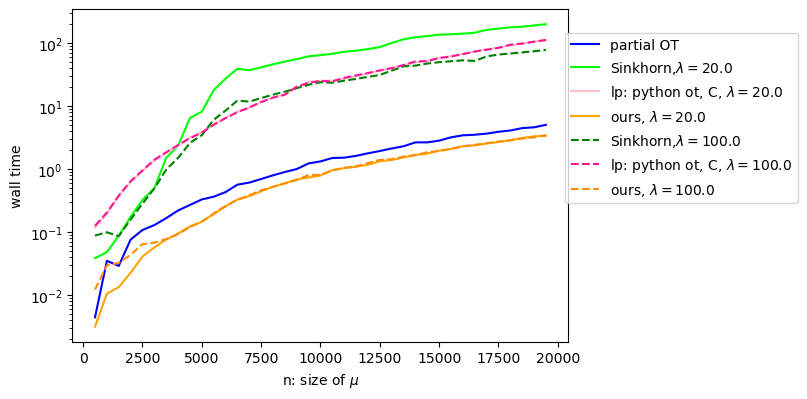

In [16]:
#Lambda_list=np.array([20,100])
data='gaussian' #'uniform' #or 'Gaussian'
color_list=[['lime','green'],['pink','deeppink'],['orange','darkorange']]
linestyle_list=['-','--']

time_list=torch.load('experiment/performance_test/result/time_list_'+data+'.pt')
time_pot_list=time_list['pot'][:,:,0]
time_new_list=time_list['new'].mean(2)
time_new_C_list=time_list['new_C'].mean(2)
time_lp_list=time_list['lp'].mean(2)
time_sinkhorn_list=time_list['sinkhorn'].mean(2)

fig = plt.figure()
ax = plt.subplot(111)
ax.semilogy(n_list,time_pot_list[:,0],'blue',label='partial OT')
for j in range(2):
    ax.semilogy(n_list,time_sinkhorn_list[:,j],linestyle=linestyle_list[j],color=color_list[0][j],label='Sinkhorn,$\lambda=$'+str(Lambda_list[j]))
    ax.semilogy(n_list,time_lp_list[:,j],linestyle=linestyle_list[j],color=color_list[1][j],label='lp: python ot, C, $\lambda=$'+str(Lambda_list[j]))
    ax.semilogy(n_list,time_new_list[:,j],linestyle=linestyle_list[j],color=color_list[2][j],label='ours, $\lambda=$'+str(Lambda_list[j]))
    #ax.semilog(n_list,time_new_C_list[:,j],linestyle=linestyle_list[j],color=color_list[2][j],label='ours,$\lambda=$'+str(Lambda_list[j]))
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(bbox_to_anchor=(0.98, 0.95))
plt.xlabel(r'n: size of $\mu$')
plt.ylabel("wall time")
plt.savefig('experiment/performance_test/result/time_'+data+'_semi.pdf',format='pdf',dpi=800,bbox_inches='tight')
#plt.title('wall-clock time with accelaration')
plt.show()

In [ ]:
time_list=torch.load('experiment/performance_test/results/time_list_uniform.pt')
n_list=time_list['n_list']
time_pot_list=time_list['pot'].mean(2)
time_lp_list=time_list['lp'].mean(2)
time_new_list=time_list['new'].mean(2)
time_new_C_list=time_list['new_C'].mean(2)
time_sinkhorn_list=time_list['sinkhorn'].mean(2)

def slop_loglog(time_list,n_list):
    N=len(time_list)
    log_time_list=np.log(time_list)
    log_n_list=np.log(n_list)
    A = np.vstack((log_n_list,np.ones(N))).T
    y = log_time_list.reshape(N,1)    
    # Direct least square regression
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
    return alpha[0]  

    
    # for i in range(N-1):
    #     slop_list[i]=(np.log(time_list[i+1])-np.log(time_list[i]))/(np.log(n_list[i+1])-np.log(n_list[i]))
    # return slop_list,slop_list.mean(0)

# print slops of all the time:
for j in range(2):
    print('$\lambda=',Lambda_list[j])
    print('slop of lp is ',slop_loglog(time_lp_list[:,j],n_list))
    print('slop of ours is ',slop_loglog(time_new_list[:,j],n_list))
    print('slop of sinkhorn is ',slop_loglog(time_sinkhorn_list[:,j],n_list))
    #print('slop of pot is ',slop_loglog(time_pot_list[:,0],n_list))
    